# Infopillar Solution

# Name : Salve Prerana Ramesh

# task no 2:- Fake news detection Project

# Dataset:- https://bit.ly/3FxCS

In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Reading the Data

In [14]:
fake = pd.read_csv("/home/ubuntu/.cache/.fr-S11rC3/news.csv")
true = pd.read_csv("/home/ubuntu/.cache/.fr-S11rC3/news.csv")
news = pd.read_csv('/home/ubuntu/.cache/.fr-S11rC3/news.csv')


In [15]:
news.shape
news.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [25]:
news.shape

(6335, 4)

In [26]:
news.info

<bound method DataFrame.info of       Unnamed: 0                                              title  \
0           8476                       You Can Smell Hillary’s Fear   
1          10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2           3608        Kerry to go to Paris in gesture of sympathy   
3          10142  Bernie supporters on Twitter erupt in anger ag...   
4            875   The Battle of New York: Why This Primary Matters   
...          ...                                                ...   
6330        4490  State Department says it can't find emails fro...   
6331        8062  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332        8622  Anti-Trump Protesters Are Tools of the Oligarc...   
6333        4021  In Ethiopia, Obama seeks progress on peace, se...   
6334        4330  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text label  
0     Daniel Greenfield, a Shillman Journalism Fell



Get the labels from the DataFrame


In [16]:


labels=news.label
labels.head()



0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

# Split the dataset into training and testing sets.


In [17]:
x_train,x_test,y_train,y_test=train_test_split(news['text'], labels, test_size=0.2, random_state=7)




Initialize a TfidfVectorizer with stop words from the English language. Stop words are the most common words in a language that are to be filtered out before processing the natural language data. And a TfidfVectorizer turns a collection of raw documents into a matrix of TF-IDF features. now fitting and transforming.


In [18]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english')
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

Next, we’ll initialize a PassiveAggressiveClassifier. This is. We’ll fit this on tfidf_train and y_train.

In [19]:
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)
#DataFlair - Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.9%


In [20]:
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[590,  48],
       [ 42, 587]])

we have 590 true positives, 584 true negatives, 45 false positives, and 48 false negatives.

# Model Evaluation

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


In [28]:
print(cm)

[[590  48]
 [ 42 587]]


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        FAKE       0.93      0.92      0.93       638
        REAL       0.92      0.93      0.93       629

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267



# Getting Accuracy


In [30]:
from sklearn.metrics import accuracy_score
print("Accuarcy: {}".format(round(accuracy_score(y_test, y_pred)*100,2)))

Accuarcy: 92.9


Accuarcy: 92.9

# Confusion matrix in a well plotted chart


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

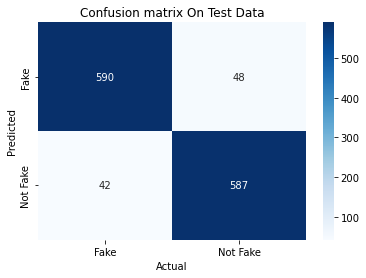

In [32]:


new_cm = pd.DataFrame(cm , index = ['Fake','Not Fake'] , columns = ['Fake','Not Fake'])
sns.heatmap(new_cm,cmap= 'Blues', annot = True, fmt='',xticklabels = ['Fake','Not Fake'], yticklabels = ['Fake','Not Fake'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion matrix On Test Data')
plt.show()

